In [1]:
import pandas as pd
df = pd.read_csv("expense.csv")
df.info()
df['Category'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Expense in ₹    6000 non-null   int64 
 1   Notes           6000 non-null   object
 2   Payment Method  6000 non-null   object
 3   Date            6000 non-null   object
 4   For What        6000 non-null   object
 5   Category        6000 non-null   object
dtypes: int64(1), object(5)
memory usage: 281.4+ KB


Category
Stationary                489
Personal Expenses         475
Transportation            472
Hotel Charges             472
Digital Tools and Apps    472
Insurance                 466
Health                    462
Recharge                  453
Groceries                 453
Food                      451
Utilities                 450
Savings & Investments     448
Entertainment             437
Name: count, dtype: int64

In [2]:
import re
def clean_text(s):
    if pd.isna(s): return ""
    s = str(s).lower()
    s = re.sub(r'₹|\$|,', '', s)       # remove currency symbols/commas
    s = re.sub(r'\d{2,}', ' <AMOUNT> ', s)  # optionally mask large numbers
    s = re.sub(r'[^a-z0-9\s\+\-@.]', ' ', s) 
    s = re.sub(r'\s+', ' ', s).strip()
    return s

df['text'] = (df['Notes'].fillna('') + ' ' + df['For What'].fillna('')).map(clean_text)

In [4]:
df

,Expense in ₹,Notes,Payment Method,Date,For What,Category,text
0,15664,Fuel expense at HP Petrol Pump,Auto-debit,5/28/2024,HP Petrol Pump,Transportation,fuel expense at hp petrol pump hp petrol pump
1,10260,Security expense at McAfee,Cash,4/18/2025,McAfee,Digital Tools and Apps,security expense at mcafee mcafee
2,14822,Books expense at Landmark,UPI,10/24/2024,Landmark,Stationary,books expense at landmark landmark
3,2504,Streaming expense at Disney+,UPI,9/27/2023,Disney+,Entertainment,streaming expense at disney+ disney+
4,3789,Fruits expense at More Retail,Card,1/20/2024,More Retail,Groceries,fruits expense at more retail more retail
...,...,...,...,...,...,...,...
5995,2852,"Streaming expense at Stewart, Kaufman and West",Card,12/30/2024,Streaming,Entertainment,streaming expense at stewart kaufman and west ...
5996,583,Dairy expense at Rivera-Clay,Cash,1/17/2025,Dairy,Groceries,dairy expense at rivera-clay dairy
5997,3420,Concerts expense at Carrillo Inc,Cash,8/8/2025,Concerts,Entertainment,concerts expense at carrillo inc concerts
5998,2969,"Hobbies expense at Davis, Fisher and Holland",Auto-debit,5/19/2024,Hobbies,Entertainment,hobbies expense at davis fisher and holland ho...


In [ ]:
from sklearn.model_selection import train_test_split
X = df['text']
y = df['Category']
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=42)

In [6]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(ngram_range=(1,2), min_df=2)),
    ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', multi_class='ovr'))
])
pipeline.fit(X_train, y_train)

d:\python_ML\.venv_tf\lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


,steps,"[('tfidf', ...), ('clf', ...)]"
,transform_input,None
,memory,None
,verbose,False
,input,'content'
,encoding,'utf-8'
,decode_error,'strict'
,strip_accents,None
,lowercase,True
,preprocessor,None
,tokenizer,None


In [7]:
pipeline.score(X_test, y_test)*100

99.16666666666667

Classification Report:
                         precision    recall  f1-score   support

Digital Tools and Apps       1.00      1.00      1.00        95
         Entertainment       1.00      0.97      0.98        87
                  Food       0.98      0.94      0.96        90
             Groceries       0.95      0.98      0.96        91
                Health       1.00      1.00      1.00        92
         Hotel Charges       1.00      1.00      1.00        94
             Insurance       1.00      1.00      1.00        93
     Personal Expenses       1.00      1.00      1.00        95
              Recharge       1.00      1.00      1.00        91
 Savings & Investments       1.00      1.00      1.00        90
            Stationary       0.97      1.00      0.98        98
        Transportation       1.00      1.00      1.00        94
             Utilities       1.00      1.00      1.00        90

              accuracy                           0.99      1200
             m

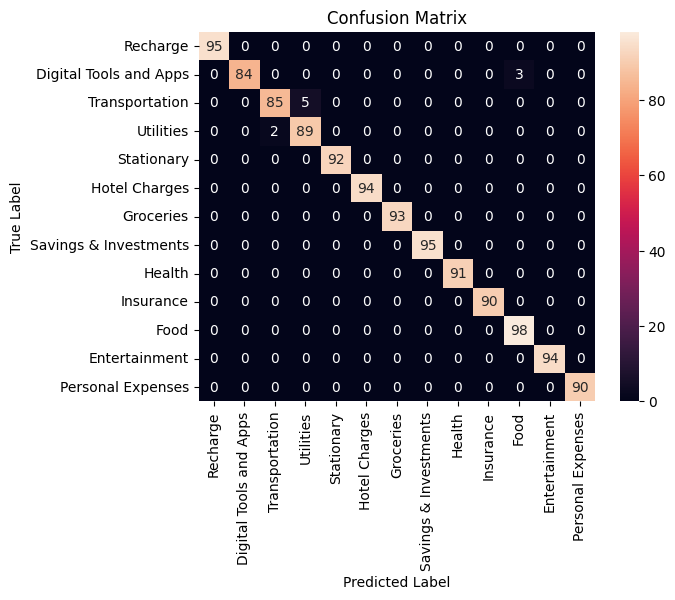

In [8]:
# from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
# cf = confusion_matrix(y_test, pipeline.predict(X_test))
# sns.heatmap(cf, annot=True,xticklabels=y_test.unique(), yticklabels=y_test.unique())

# or both are same

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Print classification report
y_pred = pipeline.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=y_test.unique(), yticklabels=y_test.unique())
plt.title("Confusion Matrix")
plt.ylabel("True Label")
plt.xlabel("Predicted Label")
plt.show()

In [9]:
import os
import joblib

# Ensure the directory exists
os.makedirs("models", exist_ok=True)

# Save the pipeline
joblib.dump(pipeline, "models/expense_pipeline.pkl")


['models/expense_pipeline.pkl']

In [10]:
def predict_category(text):
    # Load model
    pipeline = joblib.load("models/expense_pipeline.pkl")
    
    # Clean input
    cleaned = clean_text(text)
    
    # Predict
    pred = pipeline.predict([cleaned])[0]
    proba = pipeline.predict_proba([cleaned])[0].max()
    
    return pred, proba

# Example usage:
text = "30 for spotify"
category, confidence = predict_category(text)
print(f"Predicted Category: {category}, Confidence: {confidence:.2f}")

Predicted Category: Entertainment, Confidence: 0.65


# along with retraining

In [14]:
import pandas as pd 
import re
import joblib
import os
from datetime import datetime
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression

# -----------------------------
# 1. Download NLTK Data (run once)
# -----------------------------
try:
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
except LookupError:
    print("📥 Downloading NLTK data...")
    nltk.download('punkt')
    nltk.download('stopwords')
    nltk.download('wordnet')
    nltk.download('omw-1.4')
    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()

# -----------------------------
# 2. Text Cleaning Function with NLTK
# -----------------------------
def clean_text(s):
    if pd.isna(s):
        return ""
    
    s = str(s).strip().lower()
    s = re.sub(r'₹|\$|,|\.', '', s)           # remove currency symbols and commas
    s = re.sub(r'\d{3,}', '<AMOUNT>', s)      # mask large numbers
    
    tokens = word_tokenize(s)
    tokens = [token for token in tokens if re.match(r'^[a-z0-9\+\-\@\_\&<>\s]+$', token)]
    tokens = [lemmatizer.lemmatize(token) for token in tokens if token not in stop_words]
    
    cleaned = ' '.join(tokens)
    cleaned = re.sub(r'\s+', ' ', cleaned).strip()
    return cleaned

# -----------------------------
# 3. Extract ALL Amounts from Text
# -----------------------------
def extract_amounts(text):
    if not isinstance(text, str):
        return []
    matches = re.findall(r'(\d+\.?\d*)', text)
    return [float(match) for match in matches]

# -----------------------------
# 4. Load Trained Model
# -----------------------------
MODEL_PATH = "models/expense_pipeline.pkl"
TRAIN_FILE = "expense.csv"
CORRECTIONS_FILE = "corrections.csv"

if not os.path.exists(MODEL_PATH):
    raise FileNotFoundError(f"Model not found at {MODEL_PATH}. Train it first using train_model.py")

pipeline = joblib.load(MODEL_PATH)

# -----------------------------
# 5. Prediction Function
# -----------------------------
def predict_category(text):
    cleaned = clean_text(text)
    pred = pipeline.predict([cleaned])[0]
    proba = pipeline.predict_proba([cleaned]).max()
    return pred, proba

# -----------------------------
# 6. Retrain Model Using Original Data + Corrections
# -----------------------------
def retrain_model():
    if not os.path.exists(TRAIN_FILE):
        print("⚠️ Training data file 'expense.csv' not found. Skipping retrain.")
        return

    print("🔄 Retraining model with latest corrections...")

    df_train = pd.read_csv(TRAIN_FILE)
    df_train = df_train[df_train['Category'] != "Category"]
    df_train = df_train.dropna(subset=['Category'])
    df_train['Category'] = df_train['Category'].str.strip()

    if os.path.exists(CORRECTIONS_FILE):
        df_corr = pd.read_csv(CORRECTIONS_FILE)
        df_corr = df_corr.dropna(subset=['correct_category'])
        df_corr = df_corr.rename(columns={'text': 'Notes', 'correct_category': 'Category'})
        df_corr['For What'] = ""
        df_train = pd.concat([df_train, df_corr[['Notes', 'For What', 'Category']]], ignore_index=True)
        print(f"🔁 Added {len(df_corr)} corrections to training data.")

    df_train['text'] = (df_train['Notes'].fillna('') + ' ' + df_train['For What'].fillna('')).map(clean_text)
    X = df_train['text']
    y = df_train['Category']

    pipeline_new = Pipeline([
        ('tfidf', TfidfVectorizer(ngram_range=(1, 3), min_df=1, max_features=5000)),
        ('clf', LogisticRegression(max_iter=2000, class_weight='balanced', multi_class='ovr'))
    ])

    pipeline_new.fit(X, y)

    os.makedirs("models", exist_ok=True)
    joblib.dump(pipeline_new, MODEL_PATH)
    print(f"✅ Model retrained and saved to {MODEL_PATH}")

    # open(CORRECTIONS_FILE, 'w').close()
    # print("🗑️  Corrections file cleared after retraining.")
    # it causes a problem of deleting main text,correct_category,source,timestamp also

# -----------------------------
# 7. Log One Expense
# -----------------------------
def log_expense(expense_text, output_csv="predicted_expenses.csv", corrections_csv="corrections.csv"):
    predicted_cat, confidence = predict_category(expense_text)
    cleaned_text = clean_text(expense_text)
    amounts = extract_amounts(expense_text)
    total_amount = sum(amounts) if amounts else None

    row = {
        'original_text': expense_text,
        'cleaned_text': cleaned_text,
        'predicted_category': predicted_cat,
        'confidence': round(confidence, 4),
        'timestamp': datetime.now().strftime("%Y-%m-%d %H:%M:%S"),
        'amounts': str(amounts),
        'total_amount': total_amount,
        'corrected': None
    }

    # --- ACTIVE LEARNING LOGIC ---
    if confidence >= 0.6:
        row['corrected'] = 0
        print(f"✅ Logged: '{expense_text}' → {predicted_cat} (confidence: {confidence:.2f}) [AUTO-ACCEPTED]")
    else:
        print(f"\n⚠️ Low confidence ({confidence:.2f}): Model predicted '{predicted_cat}'")
        print(f"   Text: '{expense_text}'")

        while True:
            user_input = input("✅ Is this correct? (y/n) or type correct category: ").strip().lower()

            if user_input in ['y', 'yes', '']:
                row['corrected'] = predicted_cat
                print(f"✔️ Confirmed: {predicted_cat}\n")
                break

            elif user_input in ['n', 'no']:
                correct_cat = input("👉 Please enter the correct category: ").strip()
                if correct_cat:
                    row['predicted_category'] = correct_cat
                    row['corrected'] = correct_cat
                    corr_row = {
                        'text': expense_text,
                        'correct_category': correct_cat,
                        'source': 'user_correction',
                        'timestamp': row['timestamp']
                    }
                    df_corr = pd.DataFrame([corr_row])
                    if os.path.exists(corrections_csv):
                        df_corr.to_csv(corrections_csv, mode='a', header=False, index=False)
                    else:
                        df_corr.to_csv(corrections_csv, index=False)
                    print(f"💾 Correction saved to {corrections_csv}")
                else:
                    row['corrected'] = predicted_cat
                break

            else:
                correct_cat = user_input
                row['predicted_category'] = correct_cat
                row['corrected'] = correct_cat
                corr_row = {
                    'text': expense_text,
                    'correct_category': correct_cat,
                    'source': 'user_correction',
                    'timestamp': row['timestamp']
                }
                df_corr = pd.DataFrame([corr_row])
                if os.path.exists(corrections_csv):
                    df_corr.to_csv(corrections_csv, mode='a', header=False, index=False)
                else:
                    df_corr.to_csv(corrections_csv, index=False)
                print(f"✔️ Corrected to: {correct_cat}\n💾 Correction saved to {corrections_csv}")
                break

    # --- Save ONLY required columns ---
    df_new = pd.DataFrame([row], columns=[
        'original_text', 'cleaned_text', 'predicted_category',
        'confidence', 'timestamp', 'amounts', 'total_amount', 'corrected'
    ])

    if os.path.exists(output_csv):
        df_existing = pd.read_csv(output_csv)
        df_final = pd.concat([df_existing, df_new], ignore_index=True)
    else:
        df_final = df_new

    df_final.to_csv(output_csv, index=False)

    print(f"✅ Logged: '{expense_text}' → {row['predicted_category']} (confidence: {confidence:.2f})")
    if amounts:
        print(f"   Amounts: {amounts} | Total: ₹{total_amount}")
    print(f"   Saved to: {output_csv}\n")

# -----------------------------
# 8. Auto Retrain on Startup
# -----------------------------
def auto_retrain_on_startup():
    if os.path.exists(CORRECTIONS_FILE) and os.path.getsize(CORRECTIONS_FILE) > 0:
        print("🔍 Found untrained corrections. Retraining model...")
        retrain_model()
    else:
        print("✅ No corrections to apply. Using current model.")

# -----------------------------
# 9. Interactive Mode
# -----------------------------
if __name__ == "__main__":
    print("🚀 Welcome to AI Expense Tracker with Active Learning & NLTK!")
    print("Type any expense description (e.g., '30 for Netflix subscription')")
    print("Type 'quit', 'exit', or 'q' to stop.\n")

    auto_retrain_on_startup()

    while True:
        user_input = input("Enter expense: ").strip()
        if user_input.lower() in ['quit', 'exit', 'q']:
            print("\n👋 Goodbye! Your expenses and corrections have been saved.")
            break
        if not user_input:
            print("⚠️ Please enter a valid expense description.\n")
            continue
        log_expense(user_input)


🚀 Welcome to AI Expense Tracker with Active Learning & NLTK!
Type any expense description (e.g., '30 for Netflix subscription')
Type 'quit', 'exit', or 'q' to stop.

🔍 Found untrained corrections. Retraining model...
🔄 Retraining model with latest corrections...
🔁 Added 4 corrections to training data.


d:\python_ML\.venv_tf\lib\site-packages\sklearn\linear_model\_logistic.py:1273: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


✅ Model retrained and saved to models/expense_pipeline.pkl

⚠️ Low confidence (0.13): Model predicted 'Entertainment'
   Text: '45 for bottle'
💾 Correction saved to corrections.csv
✅ Logged: '45 for bottle' → utilities (confidence: 0.13)
   Amounts: [45.0] | Total: ₹45.0
   Saved to: predicted_expenses.csv

✅ Logged: '10 for tea' → food (confidence: 0.60) [AUTO-ACCEPTED]
✅ Logged: '10 for tea' → food (confidence: 0.60)
   Amounts: [10.0] | Total: ₹10.0
   Saved to: predicted_expenses.csv

✅ Logged: '50 coffee' → Food (confidence: 0.70) [AUTO-ACCEPTED]
✅ Logged: '50 coffee' → Food (confidence: 0.70)
   Amounts: [50.0] | Total: ₹50.0
   Saved to: predicted_expenses.csv


⚠️ Low confidence (0.13): Model predicted 'Entertainment'
   Text: '34 for milk'
💾 Correction saved to corrections.csv
✅ Logged: '34 for milk' → food (confidence: 0.13)
   Amounts: [34.0] | Total: ₹34.0
   Saved to: predicted_expenses.csv


⚠️ Low confidence (0.13): Model predicted 'Entertainment'
   Text: '5 for milk am